In [1]:
import numpy as np
import pandas as pd
import seaborn as sns;
import matplotlib.pyplot as plt
from scipy.special import comb

In [2]:
# Test on Original Statement

In [3]:
n = 23
P_diff = np.arange(365 - n + 1, 365 + 1.0).prod()/ np.math.pow(365, n)
1 - P_diff

0.5072972343239853

In [4]:
# Analytic Model

In [5]:
from scipy.special import comb
def get_analytic_prob(N):
    base_p = 364/ 365
    pairings = comb(N, 2)
    p_diff = np.power(base_p, pairings)
    return 1 - p_diff

In [6]:
res=[]
n=100
for i in range(1, n):
    res.append([i, get_analytic_prob(i)])


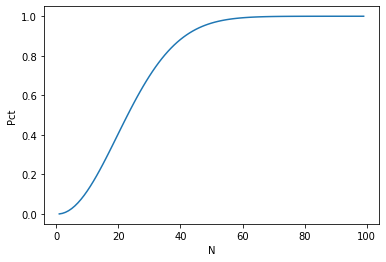

In [7]:
res=[]
n=100
for i in range(1, n):
    res.append([i, get_analytic_prob(i)])

analytic_df = pd.DataFrame(res, columns = ['N', 'Pct'])
analytic_df['Type'] = 'analytic'
ax = sns.lineplot(x='N', y='Pct', data=analytic_df)

In [8]:
analytic_df.loc[analytic_df.Pct>=.5,'N'].min()

23

In [9]:
# Empirical Model

In [10]:
all_date = np.array(pd.date_range(start='2019-01-01',end='2019-12-31').strftime("%m%d"))
def if_same_birthday(sample_size):
    sample_date = np.random.choice(all_date, sample_size, replace = 1)
    unique, counts = np.unique(sample_date, return_counts = True)
    if counts.max() > 1:
        return 1
    else:
        return 0
def get_empirical_prob(sample_size,test_iter=1000):
    res=np.array([])
    for i in range(test_iter):
        res=np.append(res,if_same_birthday(sample_size))
    return res.sum()/test_iter

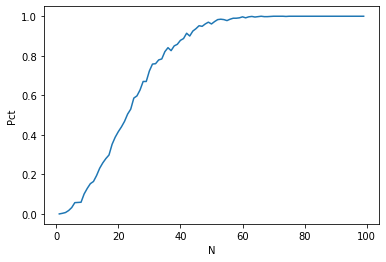

In [11]:
res=[]
n=100
for i in range(1, n):
    res.append([i, get_empirical_prob(i)])
empirical_df = pd.DataFrame(res, columns = ['N', 'Pct'])
empirical_df['Type'] = 'empirical'
ax = sns.lineplot(x='N', y='Pct', data=empirical_df)

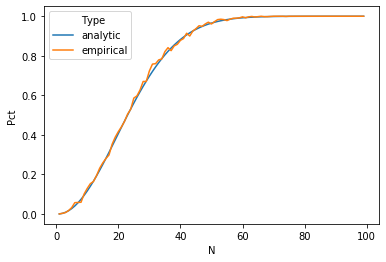

In [12]:
merge_df = pd.concat([analytic_df,empirical_df])
ax = sns.lineplot(x='N', y='Pct', data=merge_df,hue='Type')